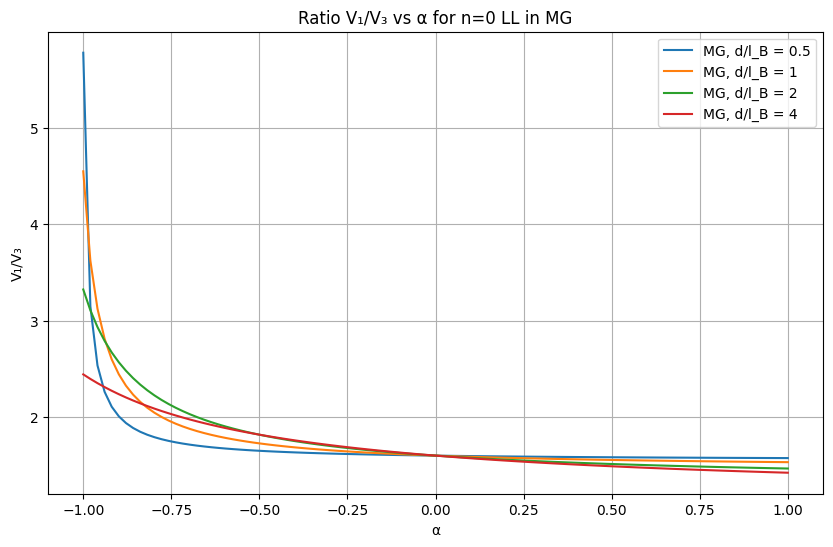

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import laguerre

def V_tilde(q, alpha, d, l_b):
    return 2 * np.pi  * l_b * (1 + alpha * np.exp(-q * d)) / q

def integrand_MG(q, m, alpha, d, l_b):
    L_m = laguerre(m)
    return (q / 2 * np.pi) * V_tilde(q, alpha, d, l_b) * np.exp(-q**2) * L_m(q**2)

def calculate_Vm(m, alpha, d, l_b , graphene_type):

  return quad(integrand_MG, 0, np.inf, args=(m, alpha, d, l_b))[0]

# Calculate V1/V3 for different alpha and d/l_B
alpha_values = np.linspace(-1, 1, 100)
d_lb_values = [0.5, 1, 2, 4]
l_b = 1
graphene_types = ['MG']

plt.figure(figsize=(10, 6))

for graphene_type in graphene_types:
    for d_lb in d_lb_values:
        V1_V3_ratio = []
        for alpha in alpha_values:
            V1 = calculate_Vm(1, alpha, d_lb * l_b, l_b , graphene_type)
            V3 = calculate_Vm(3, alpha, d_lb * l_b, l_b , graphene_type)
            # Avoid division by zero
            if V3 != 0:  # Only calculate the ratio if V3 is not zero
                V1_V3_ratio.append(V1 / V3)
            else:
                V1_V3_ratio.append(np.nan) # Append NaN if V3 is zero
        plt.plot(alpha_values, V1_V3_ratio, label=f'{graphene_type}, d/l_B = {d_lb}')

plt.xlabel('α')
plt.ylabel('V₁/V₃')
plt.title('Ratio V₁/V₃ vs α for n=0 LL in MG')
plt.legend()
plt.grid(True)
plt.show()